####[산점도 그래프]
- 두개의 컬럼(변수)의 관계를 시각화해서 표현
-연속형(수치형) 데이터에 사용함

In [46]:
# [1]
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [47]:
# [2]
file_name= r'C:\Users\KDP-25\Desktop\EX_PANDAS06\data\auto_mpg.csv'

In [48]:
# [3]
dataDF= pd.read_csv(file_name)

In [49]:
# 컬럼별 타입 확인
dataDF.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [50]:
# [4] 연비와 관련이 높은 컬럼 즉, 변수 확인
#  [4-1] 상관계수 확인
corr_DF=dataDF.corr(numeric_only=True)['mpg'].sort_values()

In [51]:
corr_DF.weight

-0.8317409332443344

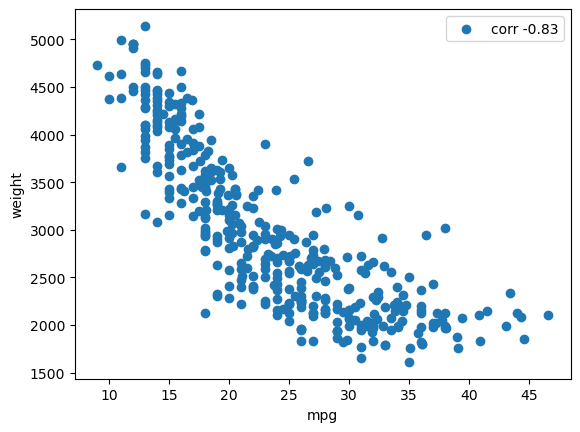

In [52]:
# [4-2] 시각화 해서 확인
plt.scatter(x=dataDF['mpg'], y= dataDF['weight'], 
            label=f'corr {round(corr_DF.weight, 2)}')
plt.xlabel('mpg')
plt.ylabel('weight')
plt.legend()
plt.show()


In [53]:
# [4-3] mpg컬럼과 다른 컬럼간의 관계 시각화

In [54]:
num_dataDF= dataDF.drop(['horsepower', 'car name'], axis=1)
num_dataDF.columns.to_list().index('weight')

3

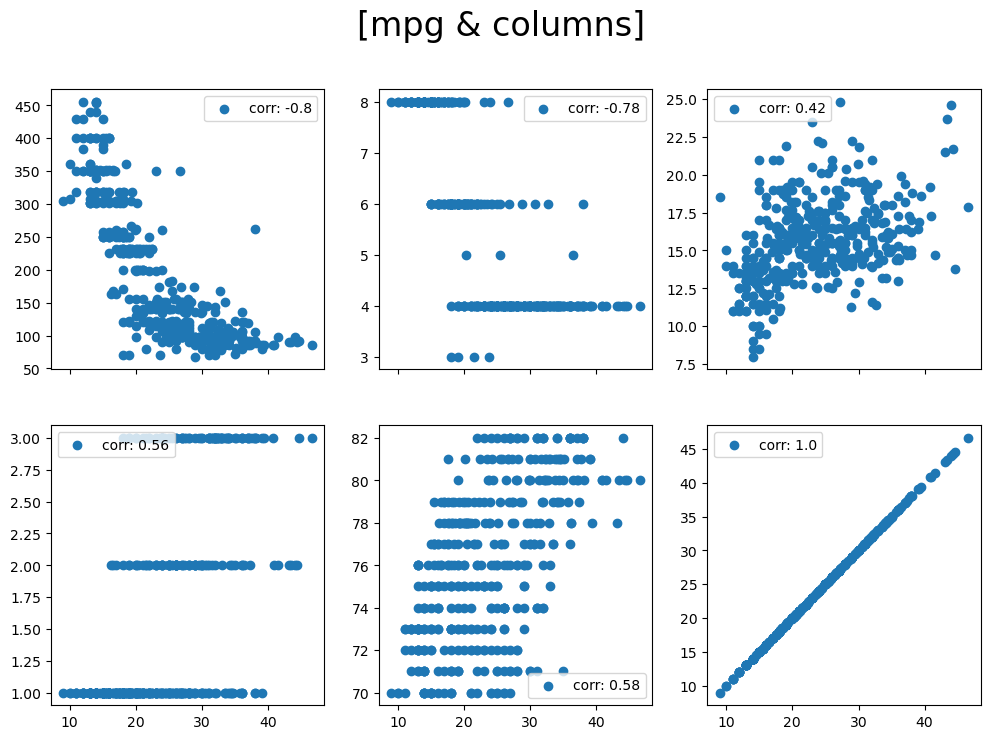

In [66]:
fig=plt.figure(figsize=(12,8))  #그래프 담을 창 생성

axs= fig.subplots(2,3, sharex=True) #그래프 담을 공간 생성
for row in range(2):
    for col in range(3):   #[0,0, 0,1, 0,2 0,3], [1,0, 1,1,] 식으로 인덱싱되기 때문에 for문 2개
        # corr_DF.index[row*3+1] --->이중 포문 바탕으로 인덱스 불러오는 방식
        col_name= corr_DF.index[row*3+col+1]
        axs[row,col].scatter(dataDF['mpg'], 
                             dataDF[col_name], 
                             label=f'corr: {round(corr_DF[col_name], 2)}')
        axs[row,col].legend()
    fig.suptitle('[mpg & columns]', fontsize=24)
    # ax.scatter(x=dataDF['mpg'], y= dataDF[corr_DF.index[idx+1]], 
    # abel=f'corr {round(corr_DF[idx], 2)}')
    # plt.xlabel('mpg')
    # plt.ylabel(corr_DF.index[idx+1])            

AttributeError: 'numpy.ndarray' object has no attribute 'scatter'

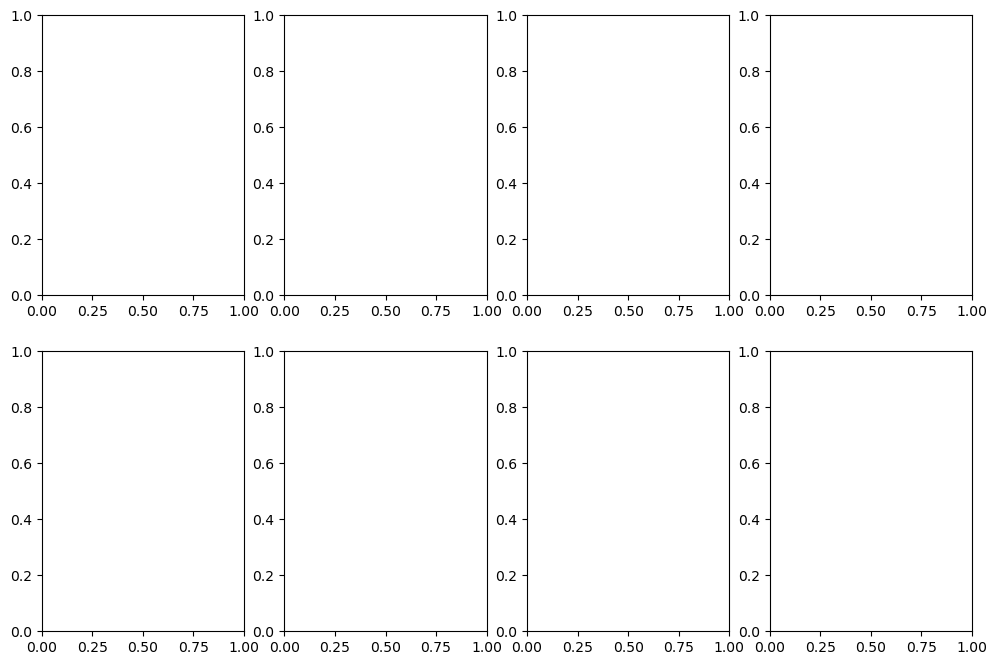

In [59]:
fig=plt.figure(figsize=(12,8))  #그래프 담을 창 생성

axs= fig.subplots(2,4) #그래프 담을 공간 생성

for ax in axs:
        for idx in num_dataDF.columns.to_list()[1:]:

                ax.scatter(x=dataDF['mpg'], y= dataDF[idx], 
                        label=f'corr {round(corr_DF[idx], 2)}')
                plt.xlabel('mpg')
                plt.ylabel(idx)